In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file (replace 'data.csv' with your filename if needed)
df = pd.read_csv('robot_logs-exp2.csv')

# Create a time step index (assuming each row is a time step)
df['Time'] = np.arange(len(df))

# Define colors for shading (with light alpha for very light shade)
shade_colors = {
    'normal': 'green',
    'slow': 'yellow',
    'stop': 'red'
}

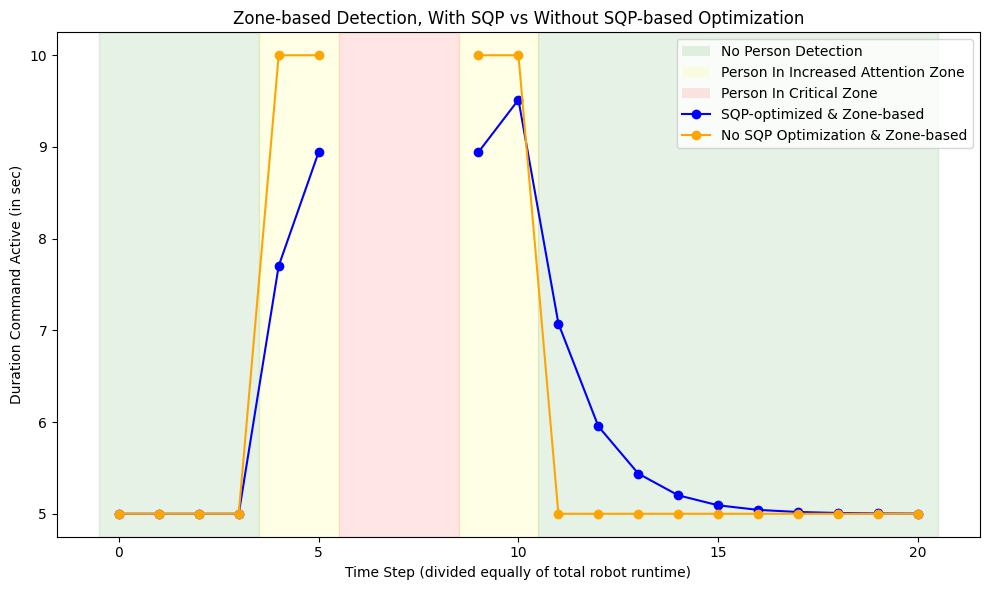

In [3]:
# Plot background shading for contiguous segments based on the 'Command' column.
fig, ax = plt.subplots(figsize=(10, 6))
start_idx = 0
current_cmd = df.loc[0, 'Command']
for i in range(1, len(df)):
    if df.loc[i, 'Command'] != current_cmd:
        # Shade the segment from start_idx to i-1
        x_start = df.loc[start_idx, 'Time'] - 0.5
        x_end = df.loc[i - 1, 'Time'] + 0.5
        ax.axvspan(x_start, x_end, color=shade_colors[current_cmd], alpha=0.1)
        start_idx = i
        current_cmd = df.loc[i, 'Command']
# Shade the final segment
x_start = df.loc[start_idx, 'Time'] - 0.5
x_end = df.loc[len(df)-1, 'Time'] + 0.5
ax.axvspan(x_start, x_end, color=shade_colors[current_cmd], alpha=0.1)

# Create new columns that are NaN where command is 'stop'
df['Duration1_plot'] = np.where(df['Command'] == 'stop', np.nan, df['Duration1'])
df['Duration2_plot'] = np.where(df['Command'] == 'stop', np.nan, df['Duration2'])

# Plot Duration1 and Duration2 with different colors and labels.
# Matplotlib will break the line at any NaN values.
ax.plot(df['Time'], df['Duration1_plot'], marker='o', label='SQP-optimized & Zone-based', color='blue')
ax.plot(df['Time'], df['Duration2_plot'], marker='o', label='No SQP Optimization & Zone-based', color='orange')

# Label the axes and title
ax.set_xlabel('Time Step (divided equally of total robot runtime)')
ax.set_ylabel('Duration Command Active (in sec)')
ax.set_title('Zone-based Detection, With SQP vs Without SQP-based Optimization')

# Create custom legend entries for background shading
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=shade_colors['normal'], alpha=0.1, label='No Person Detection'),
    Patch(facecolor=shade_colors['slow'], alpha=0.1, label='Person In Increased Attention Zone'),
    Patch(facecolor=shade_colors['stop'], alpha=0.1, label='Person In Critical Zone')
]
# Combine with the line plot legends
line_handles, line_labels = ax.get_legend_handles_labels()
ax.legend(handles=legend_elements + line_handles, loc='upper right')

plt.tight_layout()
plt.show()